# Carrying Capacity Simulation by ODE

## Population Dynamics 간단 소개
이번에 주로 다룰 Carrying Capacity(이하 CC)라는 개념은 인구 생태학 분야의 용어로, 이 의미를 잘 이해하기 위해서는 원래 해결하려던 문제가 무엇인지를 잘 이해할 필요가 있다. 인구 생태학에서 중요하게 다루는 문제 중의 하나는 바로 인구 수의 변화를 예측하는 것, 즉 population dynamics이다.

인구 수의 변화를 예측하는 방식에는 다양한 방식이 있겠지만 기본적으로는 미분방정식의 형태로 모델링한다. 미분방정식이란 시간에 따른 인구 수를 $N(t)$ 이라고 하자. 인구 수의 변화량은 이를 미분한 $\frac{dN}{dt}$ 일 것이고 이를 어떤 수식으로 표현하면 자연스럽게 인구 수를 시간에 대한 함수로 시뮬레이션할 수 있다. 

## What is Growth Rate ($r$)
가장 기초적인 단계의 population dynamics 모델링 식은 다음과 같다. 일정한 출산율/사망율을 가질 것이라는 가정 하에서 변화하는 인구 수를 나타내는 것이다. 이를 위해 출산율과 사망율을 모두 감안한 인구 성장률(growth rate) $r$을 도입할 수 있다. 예를 들어 전체 인구 중에서 매년 1%가 감소하고 5%가 증가한다면 최종 인구 성장률은 4%가 될 것이다. 미분방정식으로 나타내면 다음과 같다.

$$
\frac{dN}{dt} = rN
$$

r이 양수일 경우, 인구 수는 계속 증가할 것이고, 음수일 경우 감소할 것이다. 단순한 형태의 미분방정식이라 바로 손으로 푸는 것도 가능하다.

$$
N = N_0 e^{rt}
$$

여기서 $N_0$는 초기 인구 수이다. 이렇게 최종 솔루션이 지수 함수 형태기 때문에 이를 지수 모델이라고 한다. 이 모델은 인구 수가 지속적으로 증가(or 감소)하는 가정이기 때문에 현실적이지는 않다. 이 때문에 CC라는 개념이 등장하게 되는데, 이에 대해서는 다음에 자세히 살펴보도록 하겠다. 아래는 이 지수 모델을 시뮬레이션하는 코드이다.

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Fixed r Model (Exponential Growth)
def fixed_r_model(t, N, r):
    dNdt = r * N
    return dNdt


def solve_fixed_r_model(N_0, time_step, r):
    sol = scipy.integrate.solve_ivp(
        fixed_r_model, 
        t_span=(time_step[0], time_step[-1]), 
        y0=[N_0], 
        args=(r,), 
        t_eval=time_step
    )

    # vizualize the solution
    sns.lineplot(x=sol.t, y=sol.y[0], label=f"r={r}")
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Fixed r Model")

    return sol

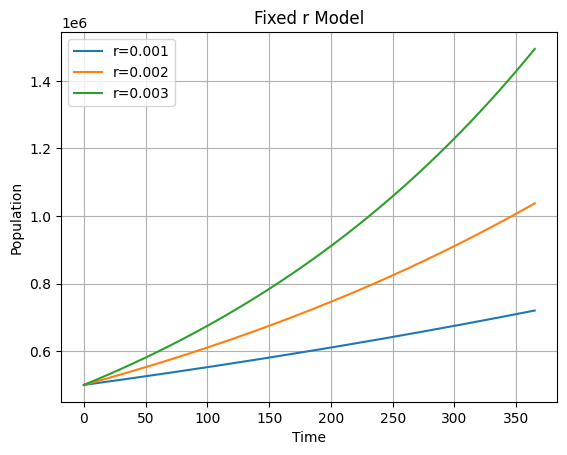

In [3]:
# CASE 1: Exponential Growth

# Time Mesh
end_time = 365 + 1
times = np.arange(0, end_time)

N_0 = 500_000  # initial population
r = 0.001  # growth rate

solve_fixed_r_model(N_0, times, r=0.001)
solve_fixed_r_model(N_0, times, r=0.002)
solve_fixed_r_model(N_0, times, r=0.003)
plt.show()

### What is Carrying Capacity ($K$)

Carrying Capacity(이하 CC)란 어떤 환경이 인구 수를 어느 정도까지 수용할 수 있느냐에 대한 능력치를 나타내는 수치다. 즉, CC가 100만이면 그 환경은 100만의 인구를 수용할 수 있는 환경이라는 뜻이다.

In [5]:
def fixed_r_K_model(t, N, r, K):
    dNdt = r * N - r / K * N ** 2
    return dNdt


def solve_fixed_r_K_model(N_0, time_step, r, K):
    sol = scipy.integrate.solve_ivp(
        fixed_r_K_model, 
        t_span=(time_step[0], time_step[-1]), 
        y0=[N_0], 
        args=(r, K), 
        t_eval=time_step
    )

    return sol

def plot_model(sol, r, K):
    # vizualize the solution
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"r={r}, K={K}")
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Fixed r, K Model")
    

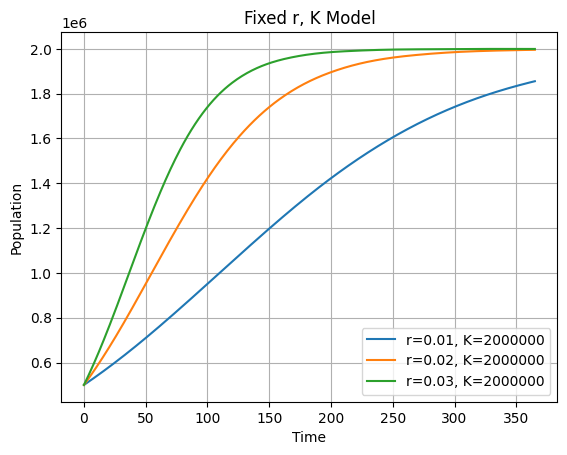

In [6]:
# CASE 1: Exponential Growth

# Time Mesh
end_time = 365 + 1
times = np.arange(0, end_time)

N_0 = 500_000  # initial population

r = 0.01
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

r = 0.02
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

r = 0.03
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

plt.ylim = (0, 5.5e5)
plt.show()

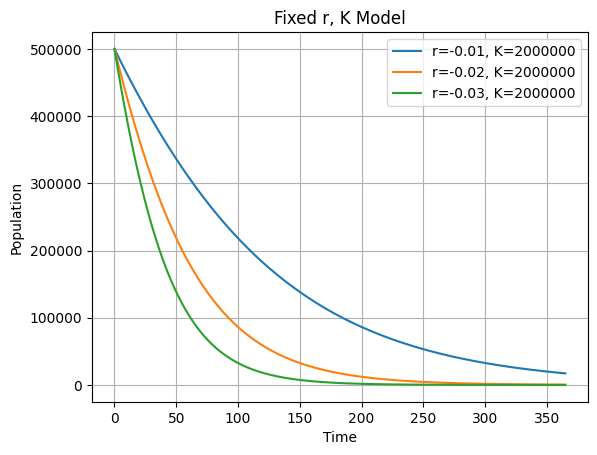

In [9]:
# CASE 1: Exponential Growth

# Time Mesh
end_time = 365 + 1
times = np.arange(0, end_time)

N_0 = 500_000  # initial population

r = -0.01
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

r = -0.02
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

r = -0.03
K = 2_000_000
sol = solve_fixed_r_K_model(N_0, times, r=r, K=K)
plot_model(sol, r, K)

plt.ylim = (0, 5.5e5)
plt.show()